# Correlation between Diversification rates and range sizes in mammals

In [1]:
import os 
import toytree
import toyplot
import pandas as pd
import numpy as np

In [2]:
#create dirs
if not os.path.exists('./databases'):
    os.makedirs('./databases')
if not os.path.exists('./trees'):
    os.makedirs('./trees')
if not os.path.exists('./stats'):
    os.makedirs('./stats')

## Download 10K mammals trees and write to a single file

In [13]:
# Mammals tree is on 
MAMMALS_ZIP = "https://data.vertlife.org/mammaltree/Completed_5911sp_topoCons_FBDasZhouEtAl.zip"

In [3]:
# the file path to write trees to
MAMMALS_TREES = "./trees/mammals_Completed_5911sp_topoCons_FBDasZhouEtAl.nwk"

In [6]:
# download file
! wget -q -P ./ $MAMMALS_ZIP

fname = MAMMALS_ZIP.rsplit("/")[-1]

# decompress archive and remove it
! unzip -q -d ./ ./$fname
os.remove(f'./{fname}')

tpath = f'./{fname.split(".")[0]}'
trees = os.listdir(tpath)

# concat all individual trees in one big newick file
for tree in trees:
    tmp_tpath = os.path.join(tpath, tree)
    ! cat $tmp_tpath >> $MAMMALS_TREES
    # remove each tree after concat   
    os.remove(tmp_tpath)
    
print('10K trees written to {}'.format(MAMMALS_TREES))

10K trees written to ./trees/mammals_Completed_5911sp_topoCons_FBDasZhouEtAl.nwk


In [4]:
# load the first tree in the file
tree = toytree.tree(MAMMALS_TREES)
print(tree.ntips, "tips in the mammals trees")

5987 tips in the mammals trees


## Calculate mammals diversification rates

In [8]:
from toytree.PCM import calculate_tip_level_diversification

In [9]:
divdf = calculate_tip_level_diversification(MAMMALS_TREES, njobs=20)
divdf.to_csv("./stats/mammals_DR-stats.csv", sep="\t")

In [5]:
#load divdf from file
divdf = pd.read_csv("./stats/mammals_DR-stats.csv", index_col=0, sep="\t")

In [6]:
divdf

,mean,median,std,2.5%,97.5%,min,max
Mastomys_erythroleucus,1.604754,1.552897,0.375923,0.774572,0.974647,0.745910,4.799912
Mastomys_natalensis,1.604534,1.553679,0.374748,0.774572,0.967510,0.745910,4.653053
Mastomys_coucha,1.445081,1.432401,0.285901,0.619664,0.804150,0.586486,3.369402
Mastomys_awashensis,0.941185,0.928049,0.178352,0.484341,0.577706,0.463103,2.311420
Mastomys_huberti,0.633579,0.622227,0.115514,0.329163,0.419916,0.325378,1.450581
...,...,...,...,...,...,...,...
X_Megaconus,0.033217,0.031125,0.010200,0.016653,0.019098,0.016512,0.129718
X_Sineleutherus,0.033258,0.031142,0.010229,0.016653,0.019032,0.016512,0.148064
X_Castorocauda,0.020066,0.018349,0.005166,0.012973,0.014170,0.012706,0.058510
X_Haldanodon,0.020166,0.018386,0.005246,0.012973,0.014190,0.012706,0.058510


In [7]:
# plot distribution of DRs across tips
toyplot.bars(
    np.histogram(divdf['mean'], bins=50, range=(0, 2.0), density=True),
    xlabel="DR (tip-level sp. rate)",
    width=350,
    height=300,
);

<svg class="toyplot-canvas-Canvas" height="300.0px" id="t6d91473349eb4d06be14266b7706141d" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 350.0 300.0" width="350.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0.0 0.5 1.0 1.5 2.0 DR (tip-level sp. rate) 0.0 0.5 1.0

## Load Mammals geographic ranges (PHYLACINE)
(https://esajournals.onlinelibrary.wiley.com/doi/full/10.1002/ecy.2443#support-information-section)

In [8]:
CSVLINK = "https://raw.githubusercontent.com/MegaPast2Future/PHYLACINE_1.2/v1.2.0/Data/Ranges/Spatial_metadata.csv"

In [13]:
# download the file to /tmp
! wget -q -P ./databases/mammals_Faurby-2018/ $CSVLINK 

In [9]:
# load the mammal biological data (e.g., geo range)
faudf = pd.read_csv("./databases/mammals_Faurby-2018/Spatial_metadata.csv")

# drop rows that are missing range info
faudf = faudf.loc[~faudf["Number.Cells.Present.Natural.Range"].isna()]
print(faudf.shape[0], "taxa in Faurby's Phylacine database")

5831 taxa in Faurby's Phylacine database


In [10]:
# distribution of geo ranges
toyplot.bars(
    np.histogram(faudf['Number.Cells.Present.Natural.Range'], bins=50),
    width=350, 
    height=300,
    xlabel="geo range size",
    yscale='log',
);

<svg class="toyplot-canvas-Canvas" height="300.0px" id="t09650026a6f94927a29a185bceaec6ac" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 350.0 300.0" width="350.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 0 10000 20000 30000 40000 geo range size 0 10 0 10 1 10 2 10 3 10 4

## Combine datasets (divdf and faudf)

In [11]:
# subselect species names, geo range, and migration columns
sppdata = faudf.loc[:, ['Binomial.1.2', 'Number.Cells.Present.Natural.Range']]

# rename sppdata columns
sppdata.columns = ["species", "georange"]

# make column to record DR stats
sppdata["divrate"] = 0

# get tips shared by tree and georange dataset
sppset = sorted(set(divdf.index.to_list()).intersection(set(sppdata.species)))

# reorder and subsample index to sppset names
sppdata = sppdata.set_index("species").loc[sppset].reset_index()

# fill divrate with estimated values
sppdata.loc[:, "divrate"] = divdf.loc[sppset, "mean"].values

In [12]:
# check if there is missing data
sppdata.isna().sum()

species     0
georange    0
divrate     0
dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sppdata['normgeo'] = StandardScaler().fit_transform(sppdata['georange'].values.reshape([-1, 1]))
sppdata['normdiv'] = StandardScaler().fit_transform(sppdata['divrate'].values.reshape([-1, 1]))
sppdata['scalegeo'] = MinMaxScaler().fit_transform(sppdata['georange'].values.reshape([-1, 1]))
sppdata['scalediv'] = MinMaxScaler().fit_transform(sppdata['divrate'].values.reshape([-1, 1]))

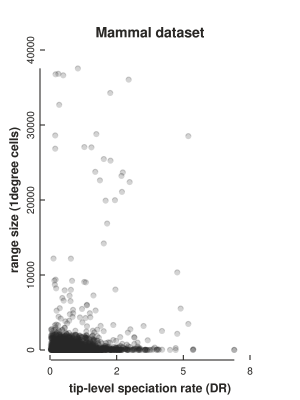

In [15]:
# Plot distribution range against diversification rate
toyplot.config.autoformat = "png"

c, a, m = toyplot.scatterplot(
    sppdata['divrate'],
    sppdata['georange'],
#     sppdata['divrate'],
#     np.log(sppdata['georange']),
    width=300, 
    height=400, 
    opacity=0.2,
    size=5,
    color="#262626",
    ylabel="range size (1degree cells)",
    xlabel="tip-level speciation rate (DR)",
    label=f"Mammal dataset"
);
a.x.ticks.show = True
a.y.ticks.show = True
# a.x.domain.max = 4

In [16]:
# write df to file
sppdata.set_index("species").to_csv("./mammals-divgeo.csv")
sppdata

,species,georange,divrate,normgeo,normdiv,scalegeo,scalediv
0,Abditomys_latidens,9,0.559244,-0.188000,-0.430135,0.000240,0.076717
1,Abeomelomys_sevia,10,0.752877,-0.187499,-0.125435,0.000266,0.104868
2,Abrawayaomys_ruschii,20,0.529214,-0.182487,-0.477391,0.000533,0.072351
3,Abrocoma_bennettii,28,0.257121,-0.178477,-0.905556,0.000746,0.032793
4,Abrocoma_boliviensis,1,0.175402,-0.192010,-1.034149,0.000027,0.020912
...,...,...,...,...,...,...,...
5417,Zyzomys_argurus,213,1.033908,-0.085750,0.316795,0.005674,0.145726
5418,Zyzomys_maini,12,1.032517,-0.186496,0.314606,0.000320,0.145524
5419,Zyzomys_palatalis,3,1.025814,-0.191007,0.304058,0.000080,0.144549
5420,Zyzomys_pedunculatus,32,1.041217,-0.176472,0.328297,0.000852,0.146788


In [38]:
# prune tree to sample in df
dtree = tree.drop_tips([i for i in tree.get_tip_labels() if i not in sppdata.species.tolist()])

# write pruned tree to file
dtree.write("./mammals_prune_5422.tre")

## Phylogenetic Linear Regression

In [17]:
%load_ext rpy2.ipython

In [50]:
%%R
#install.packages('phylolm')

library(phylolm)

set.seed(123456)
tre = read.tree("./mammals_prune_5422.tre")
dat = read.csv("./mammals-divgeo.csv", row.names=1)

#remove zeros
dat = subset(dat, georange > 0)

phylolm = phylolm(log(georange)~divrate, data=dat, phy=tre, model="lambda", boot=1000)
summary(phylolm)


Call:
phylolm(formula = log(georange) ~ divrate, data = dat, phy = tre, 
    model = "lambda", boot = 1000)

   AIC logLik 
 21380 -10686 

Raw residuals:
    Min      1Q  Median      3Q     Max 
-4.1065 -1.5951 -0.0604  1.3716  6.8338 

Mean tip height: 262.373
Parameter estimate(s) using ML:
lambda : 0.7451045
sigma2: 0.03877491 

Coefficients:
             Estimate    StdErr   t.value lowerbootCI upperbootCI  p.value   
(Intercept)  4.118002  1.626286  2.532151    1.041844      7.5804 0.011365 * 
divrate     -0.133699  0.049108 -2.722571   -0.219080     -0.0446 0.006498 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-squared: 0.001367	Adjusted R-squared: 0.001183 

Note: p-values and R-squared are conditional on lambda=0.7451045.

sigma2: 0.03877491
      bootstrap mean: 0.03864606 (on raw scale)
                      0.03853507 (on log scale, then back transformed)
      bootstrap 95% CI: (0.03288088,0.04478683)

lambda: 0.7451045
      bootstrap mean: 0.7

## Simple lm instead of phyloml

In [51]:
%%R
set.seed(123456)
tre = read.tree("./mammals_prune_5422.tre")
dat = read.csv("./mammals-divgeo.csv", row.names=1)

dat = subset(dat, georange > 0)

lm = lm(log(georange)~divrate, data=dat) #Create a linear regression with two variables
summary(lm)


Call:
lm(formula = log(georange) ~ divrate, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0518 -1.4866  0.0307  1.4676  7.1995 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.06853    0.04542   89.58  < 2e-16 ***
divrate     -0.19466    0.04335   -4.49 7.26e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.028 on 5415 degrees of freedom
Multiple R-squared:  0.00371,	Adjusted R-squared:  0.003526 
F-statistic: 20.16 on 1 and 5415 DF,  p-value: 7.263e-06



## plots in R

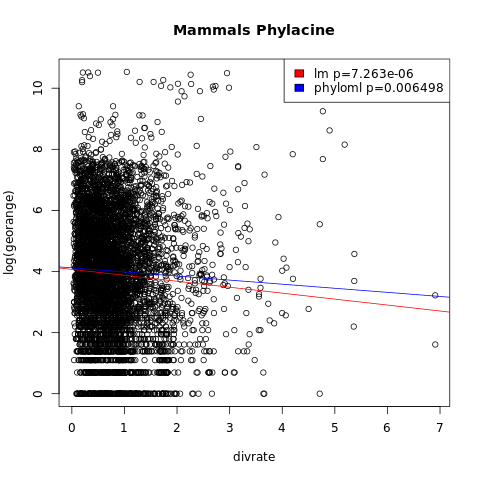

In [65]:
%%R
plot(log(georange)~divrate, data=dat, main="Mammals Phylacine")
abline(lm, col="red")
abline(phylolm, col="blue")
legend("topright", c(paste("lm"," p=",formatC(summary(lm)$coefficients[,4][2],4),sep=""),
                     paste("phyloml"," p=",formatC(summary(phylolm)$coefficients[,6][2],4),sep="")), fill=c("red","blue"))

## Plot in toyplot

In [66]:
%%R -o phylolm -o lm
## Export variables from R cells to Python cells
phylolm = phylolm
lm = lm

In [ ]:
toyplot.config.autoformat = "png"

xmax = sppdata['divrate'].max()

c, a, m = toyplot.scatterplot(
#     sppdata['divrate'],
#     sppdata['georange'],
    sppdata['divrate'],
    np.log(sppdata['georange']),
    width=300, 
    height=400, 
    opacity=0.2,
    size=5,
    color="#262626",
    ylabel="Range size (km^2)",
    xlabel="Tip-level speciation rate (DR)",
    label=f"Mammal dataset panTheria"
);
a.x.ticks.show = True
a.y.ticks.show = True
# a.y.domain.min = 0

a.plot(
    np.linspace(0, xmax),
    [lm[0][0] + lm[0][1] * i for i in np.linspace(0, xmax)],
    stroke_width=3,
    color="red",
    opacity=0.7
);

a.plot(
    np.linspace(0, xmax),
    [phylolm[0][0] + phylolm[0][1] * i for i in np.linspace(0, xmax)],
    stroke_width=3,
    color="blue",
    opacity=0.7
);